### Stock Price Prediction using Google Stock Data

### The daily mean price of Google Stock is predicted using dates as training set and mean price as target

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import datetime as dt
from sklearn.linear_model import LinearRegression
from math import sqrt

In [2]:
df=pd.read_csv('data/Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [27]:
len(df)

1258

In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


### Plotting Date vs Opening Share Price:

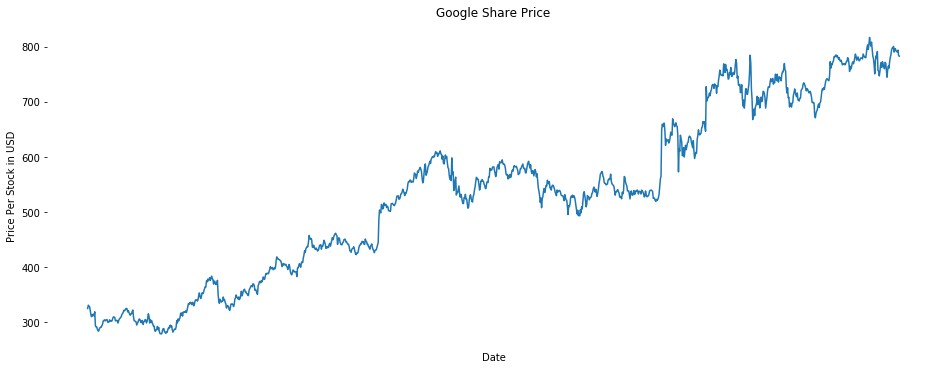

In [5]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'].values,df['Open'].values)
plt.xlabel('Date')
plt.ylabel('Price Per Stock in USD')
plt.title('Google Share Price')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

#### Some Pre-Processing:

In [6]:
df.drop(['High','Low','Volume'],axis=1,inplace=True)

In [7]:
df['Open']=df["Open"].astype(float)
df['Close']=df['Close'].str.replace(',','').astype(float)

In [8]:
df['mean_price']=(df['Open']+df['Close'])/2

In [9]:
df.tail()

,Date,Open,Close,mean_price
1253,12/23/2016,790.90,789.91,790.405
1254,12/27/2016,790.68,791.55,791.115
1255,12/28/2016,793.70,785.05,789.375
1256,12/29/2016,783.33,782.79,783.060
1257,12/30/2016,782.75,771.82,777.285


### Since Regression Models do not accept string as training data type, we need to convert the dates from str to pandas datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal) #This will convert the datetime value to float

In [11]:
df.head()

,Date,Open,Close,mean_price
0,734505,325.25,663.59,494.42
1,734506,331.27,666.45,498.86
2,734507,329.83,657.21,493.52
3,734508,328.34,648.24,488.29
4,734511,322.04,620.76,471.40


In [12]:
x_train=df['Date'].values
y_train=df['mean_price'].values
x_train=x_train.reshape(-1,1)

### Building the Machine Learning Model using LinearRegression:

In [13]:
model=LinearRegression().fit(x_train,y_train)

### Testing the model:

In [14]:
test_df=pd.read_csv('data/Google_Stock_Price_Test.csv')

In [15]:
test_df['Open']=test_df["Open"].astype(float)
test_df['Close']=test_df['Close'].astype(float)
test_df['mean_price']=(test_df['Open']+test_df['Close'])/2
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Date']=test_df['Date'].map(dt.datetime.toordinal)
x_test=df['Date'].values
y_test=df['mean_price'].values
x_test=x_test.reshape(-1,1)

In [16]:
predictions=model.predict(x_test)

### Comparing actual and predicted values side by side:

In [17]:
pd.DataFrame({'Actual':y_test,'Predicted':predictions})

,Actual,Predicted
0,494.420,505.185875
1,498.860,505.315147
2,493.520,505.444419
3,488.290,505.573691
4,471.400,505.961507
...,...,...
1253,790.405,739.943858
1254,791.115,740.460946
1255,789.375,740.590218
1256,783.060,740.719490


#### Finding accuracy of model using root mean squared error:

In [18]:
mse=metrics.mean_squared_error(y_test,predictions)
sqrt(mse)

97.33821103084203

### Testing on Actual Input Data:

### The input data will be in string format, but our model expects a 2D numpy array:

In [19]:
input_str='04/27/2020' # mm/dd/yyyy

In [20]:
inputx=pd.to_datetime(input_str)

In [21]:
inputx=dt.datetime.toordinal(inputx)

In [22]:
inputx

737542

In [23]:
import numpy as np

In [24]:
inputx=np.asarray(inputx).reshape(1,-1)

In [25]:
inputx

array([[737542]])

In [26]:
model.predict(inputx)[0]

897.7849914173858